In [524]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
df = pd.read_csv('bank-full.csv', sep=';')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [525]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [526]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [527]:
df = df.replace({'y': {'yes': 1, 'no': 0}})
df = df.replace({'default': {'yes': 1, 'no': 0}})
df = df.replace({'housing': {'yes': 1, 'no': 0}})
df = df.replace({'loan': {'yes': 1, 'no': 0}})
df = df.query('job != "unknown"')
df = df.query('marital != "unknown"')
df = df.query('education != "unknown"')
df = df.query('contact != "unknown"')
df = df.query('poutcome != "unknown"')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,0,882,0,0,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,519,1,166,1,other,1
24064,33,services,married,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,married,tertiary,0,2415,1,0,telephone,22,oct,73,1,86,4,other,0
24077,36,management,married,tertiary,0,0,1,0,telephone,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,married,tertiary,0,583,0,0,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,married,secondary,0,2850,0,0,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1


In [528]:
df.describe().round(2)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,7842.00,7842.00,7842.00,7842.00,7842.00,7842.00,7842.00,7842.00,7842.00,7842.00,7842.00
mean,40.78,0.01,1552.34,0.63,0.14,14.26,261.29,2.06,223.25,3.18,0.23
std,11.28,0.08,3084.58,0.48,0.35,7.89,236.20,1.57,111.83,4.61,0.42
min,18.00,0.00,-1884.00,0.00,0.00,1.00,5.00,1.00,1.00,1.00,0.00
25%,32.00,0.00,162.00,0.00,0.00,7.00,113.00,1.00,133.00,1.00,0.00
50%,38.00,0.00,595.00,1.00,0.00,14.00,194.00,2.00,195.00,2.00,0.00
75%,47.00,0.00,1733.75,1.00,0.00,20.00,324.00,2.00,326.00,4.00,0.00
max,89.00,1.00,81204.00,1.00,1.00,31.00,2219.00,16.00,871.00,275.00,1.00


<AxesSubplot:>

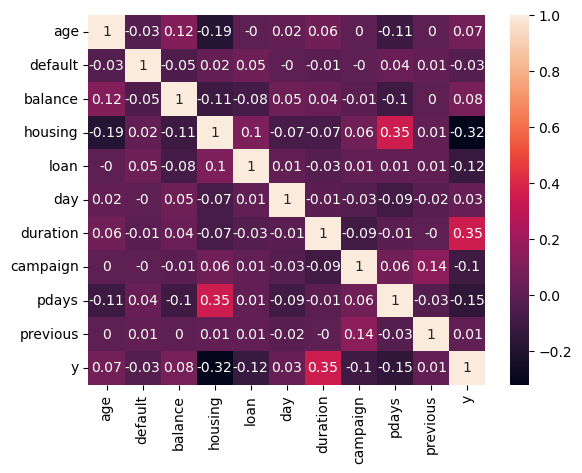

In [529]:
import seaborn as sns

sns.heatmap(df.corr().round(2), annot=True)

<AxesSubplot:>

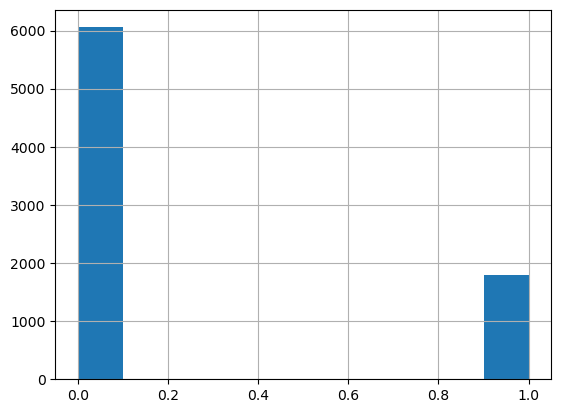

In [530]:
df.y.hist()

In [531]:
target = 'y'
predictors = [col for col in df.columns.to_list() if col != target]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,0,882,0,0,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,519,1,166,1,other,1
24064,33,services,married,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,married,tertiary,0,2415,1,0,telephone,22,oct,73,1,86,4,other,0
24077,36,management,married,tertiary,0,0,1,0,telephone,23,oct,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,nov,1166,3,530,12,other,0
45201,53,management,married,tertiary,0,583,0,0,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,married,secondary,0,2850,0,0,cellular,17,nov,300,1,40,8,failure,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1


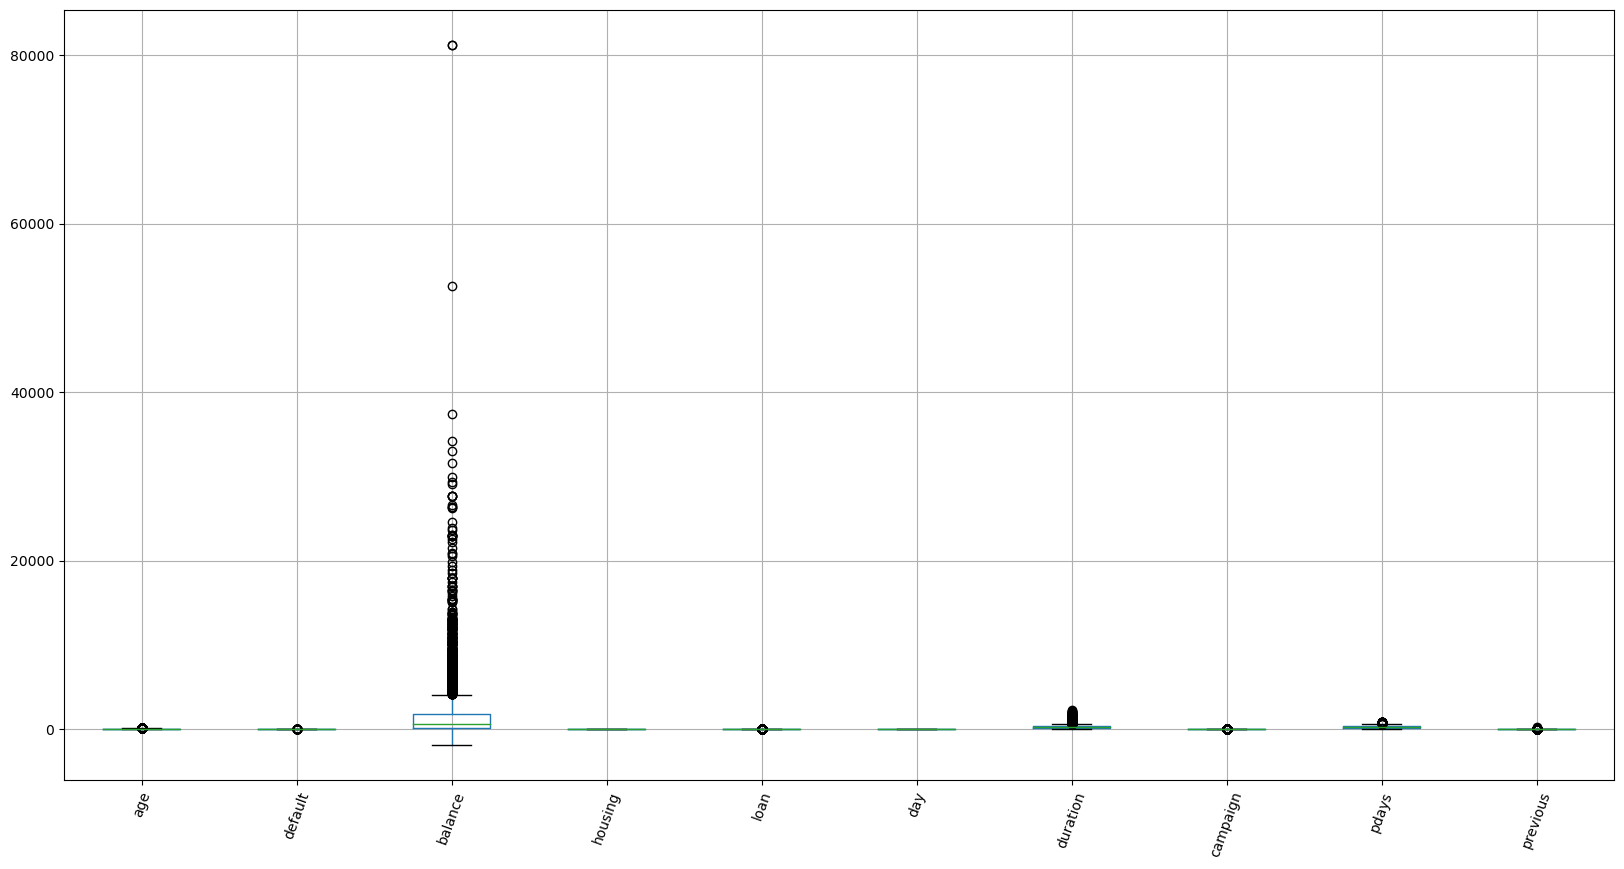

In [532]:
plt.figure(figsize=(20, 10))  
df[predictors].boxplot()
plt.xticks(rotation=70) 
plt.show()

In [533]:
print(pd.DataFrame({'no': df['y'].tolist().count(0), 
                    'yes': df['y'].tolist().count(1), 
                    'n/y': round(df['y'].tolist().count(0)/df['y'].tolist().count(1),2), 
                    'y/n': round(df['y'].tolist().count(1)/df['y'].tolist().count(0),2), 
                    'n%': round(df['y'].tolist().count(0)/len(df['y'].tolist()),2), 
                    'y%': round(df['y'].tolist().count(1)/len(df['y'].tolist()),2)}, 
                   index=[0]).to_string(index=False))

  no  yes  n/y  y/n   n%   y%
6056 1786 3.39 0.29 0.77 0.23


In [534]:
predictors = df.drop('y', axis = 1)
target = df['y']

In [535]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=7)

X_train.shape, X_test.shape

((5489, 16), (2353, 16))